In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [53]:
# lets start the interpolation with at least two frquencies, f_a and f_b, as literature
frequencies = [23600, 23800] # Hz

# here we set the minimun delta between the frequencies we want. Need to set this value according to our limitations
df_min = 100 # Hz

# finally, set the step we want to wipe out our possibilties
step = 10 # Hz

frequencies = list(np.unique(frequencies))

In [54]:
# we don't need to calculate our harmonics since it gonna be too far from our f_a and f_b,
# but it gonna be a good one to see their values, besides being trivial

def second_harmonic(f):
    return 2 * f

def third_harmonic(f):
    return 3 * f

In [55]:
# ok, this is where it gets kindly complexy, but intermodulation from second and third order
# may be easily found in literature, and must search latter their deductions to understand it better.
# however, here we do the implemation of the second and third orded distortion that we can find
# between two frequencies

# f_2 - f_1
# f_1 + f_2
def second_order_distortion(frequencies):
    distortions = []

    for i in range(0, len(frequencies)):
        for k in range(i, len(frequencies)):
            f_1 = frequencies[i]
            f_2 = frequencies[k]

            distortions.append(f_2 - f_1)
            distortions.append(f_1 + f_2)
    
    return list(np.unique(distortions))

# 2 * f_1 - f_2
# 2 * f_2 - f_1
# f_1 + f_2 - f_3
def third_order_distortion(frequencies):
    distortions = []

    for i in range(0, len(frequencies)):
        for k in range(0, len(frequencies)):
            for j in range(0, len(frequencies)):
                f_1 = frequencies[i]
                f_2 = frequencies[k]
                f_3 = frequencies[j]

                if i != k and i != j and j != k:
                    distortions.append(2 * f_1 - f_2)
                    distortions.append(2 * f_2 - f_1)
                    distortions.append(f_1 + f_2 - f_3)
                
    return list(np.unique(distortions))

def get_delta(frequencie, frequencies):
    pass

In [56]:
# since we will not be doing min() function in the begging as described by Pasku,
# we need to get the delta values between the current frequencie and the others discovered
# frequencis to compare with the minimun delta value
def get_delta(frequencie, frequencies):
    deltas = [abs(f - frequencie) for f in frequencies]
    
    return min(deltas)

# this function will interate thru values, according to the stabilished step, to find
# plausivible values that satisfies second and third constraints. When a valid is found,
# this new value is added to the list of frequencies
def get_frequencies_set(frequencies, size, max_frequencie):
    next_frequencie = max(frequencies) + step
    
    while len(frequencies) < size and max(frequencies) < max_frequencie:
        second_harmonics = [second_harmonic(f) for f in frequencies + [next_frequencie]]
        third_harmonics = [third_harmonic(f) for f in frequencies + [next_frequencie]]
        second_distortions = second_order_distortion(frequencies + [next_frequencie])
        third_distortions = third_order_distortion(frequencies + [next_frequencie])
        
        avoid_frequencies = second_harmonics + third_harmonics + second_distortions + third_distortions
        
        if (not next_frequencie in avoid_frequencies) and get_delta(next_frequencie, avoid_frequencies) > df_min:
            frequencies = frequencies + [next_frequencie]
        
        next_frequencie = next_frequencie + step
        
    return frequencies

In [57]:
# just a complementar function to get second and third harmonics and distortions
# to be used as plot and get a visual interpretation of what we are getting
def describe_frequencies(frequencies):
    second_harmonics = [second_harmonic(f) for f in frequencies]
    third_harmonics = [third_harmonic(f) for f in frequencies]
    second_distortions = second_order_distortion(frequencies)
    third_distortions = third_order_distortion(frequencies)

    return {
        "second_harmonics":second_harmonics,
        "third_harmonics":third_harmonics,
        "second_distortions":second_distortions,
        "third_distortions":third_distortions,
        "frequencies_set": frequencies
    }

In [58]:
generated_frequencies = get_frequencies_set(frequencies, 10, 26000)

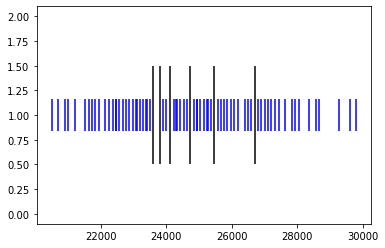

In [59]:
described_freq = describe_frequencies(generated_frequencies)


plt.figure()

plt.eventplot(described_freq["frequencies_set"], orientation='horizontal', colors='k')
# plt.eventplot(described_freq["second_harmonics"], orientation='horizontal', colors='c')
# plt.eventplot(described_freq["third_harmonics"], orientation='horizontal', colors='k')
# plt.eventplot(described_freq["second_distortions"], orientation='horizontal', linelengths=.66, colors='r')
plt.eventplot(described_freq["third_distortions"], orientation='horizontal', linelengths=.33, colors='b')

# plt.axis('off')
plt.show()

In [60]:
described_freq

{'second_harmonics': [47200, 47600, 48220, 49460, 50920, 53400],
 'third_harmonics': [70800, 71400, 72330, 74190, 76380, 80100],
 'second_distortions': [0,
  200,
  310,
  510,
  620,
  730,
  930,
  1130,
  1240,
  1350,
  1660,
  1860,
  1970,
  2590,
  2900,
  3100,
  47200,
  47400,
  47600,
  47710,
  47910,
  48220,
  48330,
  48530,
  48840,
  49060,
  49260,
  49460,
  49570,
  50190,
  50300,
  50500,
  50810,
  50920,
  51430,
  52160,
  53400],
 'third_distortions': [20500,
  20700,
  20900,
  21010,
  21210,
  21520,
  21630,
  21740,
  21830,
  21940,
  22140,
  22250,
  22360,
  22450,
  22470,
  22560,
  22670,
  22760,
  22870,
  22980,
  23070,
  23090,
  23180,
  23290,
  23380,
  23400,
  23490,
  23910,
  24000,
  24220,
  24310,
  24330,
  24420,
  24530,
  24620,
  24840,
  24930,
  24950,
  25040,
  25150,
  25240,
  25260,
  25350,
  25570,
  25660,
  25770,
  25860,
  25970,
  26080,
  26190,
  26390,
  26500,
  26590,
  26810,
  26900,
  27010,
  27120,
  2721

In [61]:
generated_frequencies

[23600, 23800, 24110, 24730, 25460, 26700]